

# Will an Investor Change the risk tolerance post crisis ?

The goal of this project is to build a machine learning model to predict whether the risk tolerance of a person is likely to change with the change in the market. The risk tolerance is once of the most important parameter for the portfolio management and it is decided using questionnaire which is prone to error as Investors suffer from behavioral biases and are poor judges on their own risk perception. 

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve
Board. The survey includes responses to around 19,285 households. Typically the survey is conducted every three years using a different set of households every time. However, in 2009, the Federal Reserve Board decided to re-interview the 2007 respondents to see how their responses had changed due to the Global Financial Crisis. The dataset from "Survey of Consumer Finances" contains the Household's demographics, net worth, financial and non-financial assets for the same demographics in 2007 (pre-crisis) and 2009(post-crisis). This is particularly beneficial for our study since we can see how each household’s allocation changed from before to after the crisis. The data source is : 
https://www.federalreserve.gov/econres/scf_2009p.htm


The focus of this case study are:
* Multiclass classification algorithm.
* Defining problem statement in a Machine learning classification framework.
* Data Reduction and feature reduction.
* Understanding the feature importance pre and post model development.



## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
* [4.Evaluate Algorithms and Models](#4)        
    * [4.1. Train/Test Split](#4.1)
    * [4.2. Test Options and Evaluation Metrics](#4.2)
    * [4.3. Compare Models and Algorithms](#4.3)
* [5. Model Tuning and Grid Search](#5)  
* [6. Finalize the Model](#6)  
    * [6.1. Results on test dataset](#6.1)
* [7 Feature Analysis](#7)
    * [7.1. Feature Importance](#7.1)
    * [7.2. Feature Intuition](#7.2)


<a id='0'></a>
# 1. Introduction

The goal of this project is to build a machine learning model to predict whether a person is likely to change the risk tolerance with the change in the market situation

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve
Board. The survey includes responses to around 19,285 households.Typically the survey is conducted every three years using a different set of households every time. The dataset from "Survey of Consumer Finances" contains the Household's demographics, net worth, financial and non-financial assets for the same demographics in 2007 (pre-crisis) and 2009(post-crisis) and there are 500+ features. 

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

Using TensorFlow backend.


<a id='1.2'></a>
## 2.2. Loading the Data

In [4]:
# load dataset
dataset = pd.read_excel('SCFP2009panel.xlsx')

In [7]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [158]:
type(dataset)

pandas.core.frame.DataFrame

In [159]:
dataset.shape

(19285, 35)

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable

The dataset from "Survey of Consumer Finances" contains the Household's demographics, net worth, financial and non-financial assets for the same demographics in 2007 (pre-crisis) and 2009(post-crisis). 

The data can be used to get the implied Risk Aversion for the household from the Household's demographics, net worth, financial and non-financial assets as per Schooley and Worden (1996) (Risk Aversion Measures: Comparing Attitudes and Asset Allocation. Financial Services Review. 5 (2): 87-99) and is shown below: 

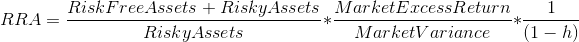

* **Risky assets** is investments in mutual funds, stocks, bonds, commodities, and
real estate, and an estimate of human capital. 
* **Risk Free Assets**: checking and savings balances,certificates of deposit, and other cash balances and equivalents.
* **Ratio of MarketExcessReturn to Variance**: This is similar to sharp ratio is constant among all the market participants.
* **h**: It is the ratio of human capital to total wealth.To compute human capital people are assumed to work until they are 65, their incomes increase by 3% annually and the average interest rate is 5% based on 10 year treasury yields during 2007. Since this is a long term measure. We define wealth as the sum of risky and risk-free assets



In [8]:
dataset['UntilRetire07'] = dataset['AGE07'].apply(lambda x: max((70 - x),0))
dataset['Multiplier07'] = dataset['UntilRetire07'].apply(lambda x: ((pow(1.07,x) - 1)/(0.05)))

dataset['RiskFree07']= dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['HumanCap07'] = dataset['Multiplier07']*dataset['INCOME07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07'] + dataset['HumanCap07']
dataset['Alpha07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])
dataset['h07'] = dataset['HumanCap07']/(dataset['HOUSES07'] + dataset['Risky07']+dataset['RiskFree07'])
dataset['CValue07'] = 0.45/((1-dataset['h07'])*(dataset['Alpha07']))

dataset['UntilRetire09'] = dataset['AGE07'].apply(lambda x: max((70 - x),0))
dataset['Multiplier09'] = dataset['UntilRetire07'].apply(lambda x: ((pow(1.07,x) - 1)/(0.05)))

dataset['RiskFree09']= dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['HumanCap09'] = dataset['Multiplier09']*dataset['INCOME09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09'] + dataset['HumanCap09']
dataset['Alpha09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])
dataset['h09'] = dataset['HumanCap09']/(dataset['HOUSES09'] + dataset['Risky09']+dataset['RiskFree09'])
dataset['CValue09'] = 0.45/((1-dataset['h09'])*(dataset['Alpha09']))
dataset['PercentageChange'] = dataset['CValue09']/dataset['CValue07']-1

The predicted variable is the degree of percentage change in Risk Aversion between 2007 and 2009, and is defined as follows:
* Change > 75%  = 1
* Change <-.75% = -1
* -75% < Change > 75% = 0

In [9]:
dataset['ChangeRiskAversion'] = np.where(dataset['PercentageChange'] > .75, 1.0, (np.where(dataset['PercentageChange'] < -.75,-1,0)))

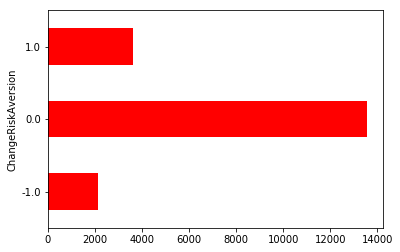

In [10]:
fig = plt.figure()
plot = dataset.groupby(['ChangeRiskAversion']).size().plot(kind='barh', color='red')
plt.show()

In [11]:
dataset['ChangeRiskAversion'].value_counts(normalize=True, dropna=False)

 0.0    0.702411
 1.0    0.187088
-1.0    0.110500
Name: ChangeRiskAversion, dtype: float64

About 70% of the People didn't change the risk aversion, however, around 18% increased their risk aversion and 11% decreased the risk aversion by more than 75%. Can we predict the factors and what caused people to change their risk aversion. 

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

In [12]:
dataset.shape

(19285, 533)

In [13]:
# types
set_option('display.max_rows', 500)
#dataset.dtypes

YY1                     int64
Y1                      int64
WGT09                 float64
AGE07                   int64
AGECL07                 int64
EDUC07                  int64
EDCL07                  int64
MARRIED07               int64
KIDS07                  int64
LIFECL07                int64
FAMSTRUCT07             int64
RACECL                  int64
H_RACECL                int64
RACE                    int64
H_RACE                  int64
OCCAT107                int64
OCCAT207                int64
INDCAT07                int64
HHEALTH07               int64
SPHEALTH07              int64
INCOME07              float64
WAGEINC07             float64
BUSSEFARMINC07        float64
INTDIVINC07           float64
KGINC07               float64
SSRETINC07            float64
TRANSFOTHINC07        float64
PENACCTWD07             int64
NORMINC07             float64
RISK07                  int64
PSAVING07             float64
WSAVED07                int64
SAVED07                 int64
SAVRES1   

<a id='2.2.2'></a>
### 3.2.2.  Features elimination

In order to filter the features further we do the following:
1. Check the description in the Data Dictionary (https://www.federalreserve.gov/econres/files/codebk2009p.txt, https://www.federalreserve.gov/econresdata/scf/files/fedstables.macro.txt)and only keep the features that are intuitive
The description is as follows: 
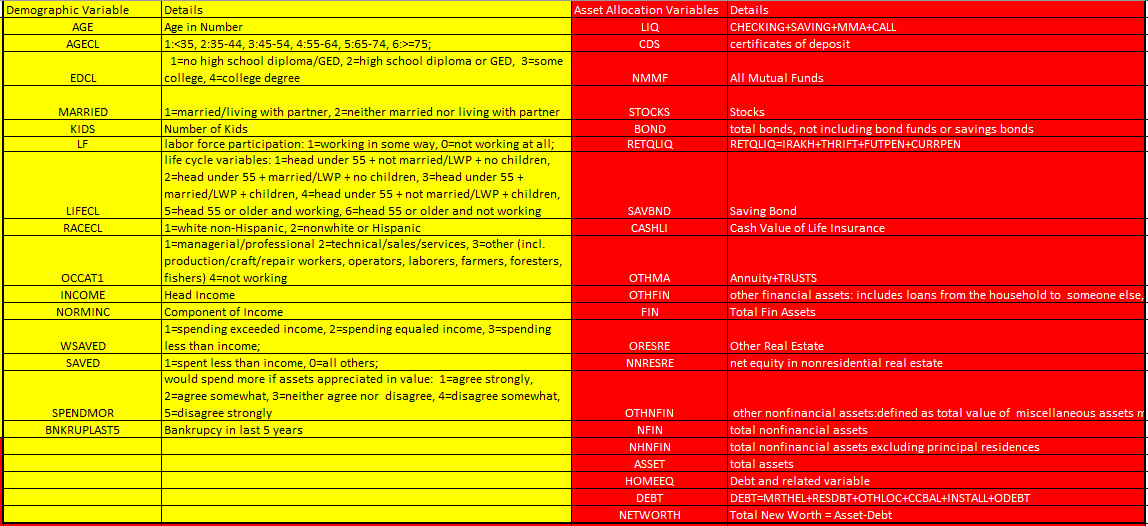


2. Keep only the intuitive factors as of 2007 only and remove all the intermediate features and features related to 2009, as the variables of 2007 are the only ones required for predicting a change in the risk tolerance.


In [14]:
keep_list = ['ChangeRiskAversion','AGE07', 'AGECL07', 'EDCL07', 'MARRIED07', 'KIDS07', 'LIFECL07', 'OCCAT107', 'INCOME07', 'NORMINC07', 'RISK07', 'WSAVED07', 'SAVED07', 'SPENDMOR07', 'LIQ07', 'CDS07', 'NMMF07', 'STOCKS07', 'BOND07', 'RETQLIQ07', 'SAVBND07','CASHLI07', 'OTHMA07', 'OTHFIN07', 'FIN07', 'ORESRE07', 'NNRESRE07', 'OTHNFIN07', 'NFIN07', 'NHNFIN07', 'HOUSES07', 'ASSET07', 'HOMEEQ07', 'DEBT07', 'NETWORTH07', 'RISK07']
len(keep_list)

36

In [15]:
drop_list = [col for col in dataset.columns if col not in keep_list]

dataset.drop(labels=drop_list, axis=1, inplace=True)

dataset.shape

(19285, 35)

In [16]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [17]:
# Drop the rows containing NA
dataset=dataset.dropna(axis=0)
dataset=dataset.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
dataset.shape

(19285, 35)

<a id='4'></a>
# 4. Evaluate Algorithms and Models

<a id='4.1'></a>
## 4.1. Train Test Split

In [40]:
# split out validation dataset for the end
Y= dataset["ChangeRiskAversion"]
X = dataset.loc[:, dataset.columns != 'ChangeRiskAversion']
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(rescaledX, Y, test_size=validation_size, random_state=seed)

In [20]:
dataset['ChangeRiskAversion'].value_counts()

 0.0    13546
 1.0     3608
-1.0     2131
Name: ChangeRiskAversion, dtype: int64

<a id='4.2'></a>
## 4.2. Test Options and Evaluation Metrics


In [160]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring ='precision'
#scoring ='recall'
#scoring = 'roc_auc'

<a id='4.3'></a>
## 4.3. Compare Models and Algorithms

### Classification Models

In [285]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Neural Network
models.append(('NN', MLPClassifier()))
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

### K-folds cross validation

In [286]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.703980 (0.007770)
LDA: 0.703591 (0.007521)
KNN: 0.846317 (0.011164)
CART: 0.929543 (0.006309)
NB: 0.237749 (0.009657)
NN: 0.783250 (0.008020)
AB: 0.716036 (0.010712)
GBM: 0.770677 (0.010944)
RF: 0.949766 (0.005895)


In [50]:
### Algorithm comparison

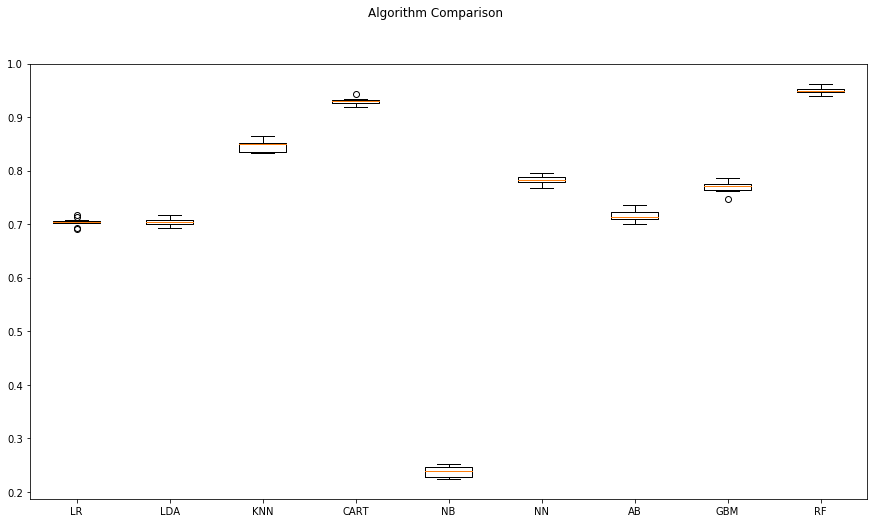

In [287]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

<a id='5'></a>
# 5. Model Tuning and Grid Search

Given that the Random Forest is the best model, Grid Search is performed on Random Forest.

In [288]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
    
'''   
n_estimators = [20,80,200]
max_depth= [5,100]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier(n_jobs=-1)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.958971 using {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 80}
#7 0.713508 (0.008355) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#10 0.709684 (0.007648) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#9 0.710202 (0.007921) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}
#5 0.955795 (0.003819) with: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 20}
#1 0.958971 (0.004656) with: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 80}
#2 0.958582 (0.005108) with: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 200}
#8 0.711174 (0.009196) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#11 0.708582 (0.007772) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#12 0.706961 (0.008451) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}
#6 0.954952 (0.005331) with: {'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 20}
#4 0.958128 (0.004774) 

<a id='6'></a>
# 6. Finalise the Model

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 6.1. Results on the Test Dataset

In [21]:
# prepare model
model = RandomForestClassifier(criterion='gini', max_depth= 100, n_estimators= 80,n_jobs=-1)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [22]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9585169821104486
[[ 442   25    0]
 [  17 2621   45]
 [   0   73  634]]
              precision    recall  f1-score   support

        -1.0       0.96      0.95      0.95       467
         0.0       0.96      0.98      0.97      2683
         1.0       0.93      0.90      0.91       707

    accuracy                           0.96      3857
   macro avg       0.95      0.94      0.95      3857
weighted avg       0.96      0.96      0.96      3857



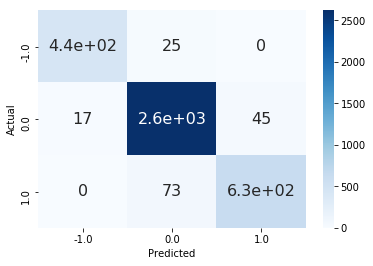

In [23]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font sizes

From the confusion matrix shown above, the random forest algorithm predicts both the classes of 1 and -1 where the investors change the risk tolerance quite accurately. The overall accuracy of the test set is above 95%.


<a id='7'></a>
# 7. Feature Importance and Features Intuition

<a id='7.1'></a>
## 7.1. Feature Importance
Looking at the details above Random forest be worthy of further study.
Let us look into the Feature Importance of the RF model

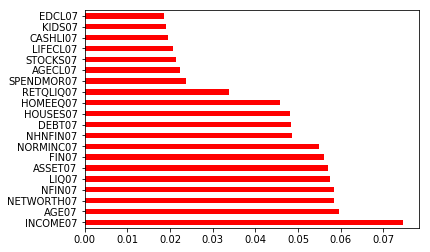

In [156]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(20).plot(kind='barh',color='r' )
plt.show()

<a id='7.2'></a>
## 7.2. Feature Intuition

Analysing the important features

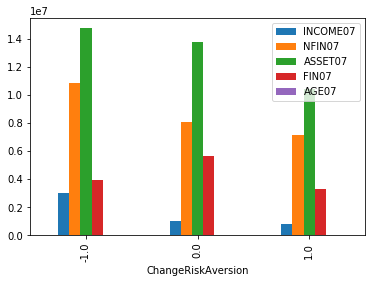

In [138]:
dataset.groupby('ChangeRiskAversion').mean()[['INCOME07','NFIN07','ASSET07','FIN07']].plot.bar()

It is clear from the chart above that the investors who had lower income and asset become more risk averse, and the investors who had higher income had decreased risk aversion.

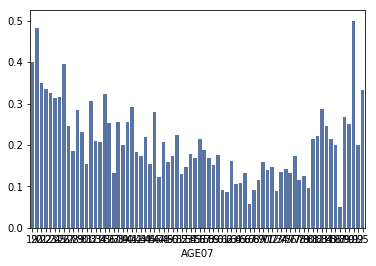

In [74]:
charge_off_rates = dataset.groupby('AGE07')['ChangeRiskAversion'].value_counts(normalize=True).loc[:,1]
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1)

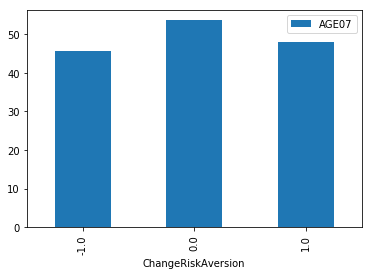

In [139]:
dataset.groupby('ChangeRiskAversion').mean()[['AGE07']].plot.bar()

In [155]:
dataset.groupby('AGECL07')['ChangeRiskAversion'].value_counts(normalize=True).loc[:,-1]

AGECL07
1    0.191597
2    0.129609
3    0.118354
4    0.087112
5    0.044259
6    0.056970
Name: ChangeRiskAversion, dtype: float64

The change in risk aversion changes with the age and people and people with relatively younger age change their risk appetite. Also, for the change to -1, people who became more risk takers after crisis period were younger people. 

__Conclusion__:
* Data Preparation and Cleaning involves Data Transformation, Data Reduction and Data Discretization and is one of the most important step for modelling when there is a large number of features
* A problem statement can be transformed into multiclass classification problem for better analysis. All the classification techniques and visualisation hold even in case of multiclass classification problem. 
* The results of the this case study are quite intuitive. The investors who had lower income and asset become more risk averse, and the investors who had higher income had decreased risk aversion. The change in risk aversion changes with the age and people and people with relatively younger age change their risk appetite. 



